In [1]:
# set workspace
WorkLocation = "Home"

if WorkLocation == "Home":
    folder_path = r'C:\Users\rentr\Desktop\ENGO\DataMining\ENGO645_TermProject_Data'
elif WorkLocation == "School":
    folder_path = r'D:\ENGO645_TermProject_Data'

print(folder_path)

C:\Users\rentr\Desktop\ENGO\DataMining\ENGO645_TermProject_Data


In [2]:
import os
import geopandas as gpd
import pandas as pd

# Load the MCI file
MCI_file = os.path.join(folder_path, "MCI_Cleaned.csv")
MCI_data = pd.read_csv(MCI_file)

MCI_data.head()

,OCC_YEAR,OCC_MONTH,SEASON,OCC_DAY,OCC_DOY,OCC_DOW,DOW_WorkvsEnd,OCC_HOUR,TIMECategory,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,DATE_TIME_LINK,TEMP,TEMPCategory
0,2023,January,Winter,1,1,Sunday,Weekend,2,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery With Weapon,Robbery,Corso Italia-Davenport,-79.450529,43.676205,2023/1/1 2,4.7,Mild
1,2023,January,Winter,1,1,Sunday,Weekend,1,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Other,Robbery,St Lawrence-East Bayfront-The Islands,-79.368457,43.648776,2023/1/1 1,4.5,Mild
2,2023,January,Winter,1,1,Sunday,Weekend,9,Morning,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Morningside Heights,-79.202638,43.815274,2023/1/1 9,4.4,Mild
3,2023,January,Winter,1,1,Sunday,Weekend,3,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault With Weapon,Assault,New Toronto,-79.517052,43.600915,2023/1/1 3,4.9,Mild
4,2023,January,Winter,1,1,Sunday,Weekend,21,Evening,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,Victoria Village,-79.300571,43.719703,2023/1/1 21,4.1,Mild


In [3]:
# filter out columns which are not required
MCI_data_filtered = MCI_data.drop(columns=['OCC_YEAR','OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_HOUR', 'LOCATION_TYPE', 'OFFENCE', 'LONG_WGS84', 'LAT_WGS84', 'DATE_TIME_LINK', 'TEMP'])

MCI_data_filtered.head()

,SEASON,OCC_DOW,DOW_WorkvsEnd,TIMECategory,PREMISES_TYPE,MCI_CATEGORY,NEIGHBOURHOOD_158,TEMPCategory
0,Winter,Sunday,Weekend,Night,Outside,Robbery,Corso Italia-Davenport,Mild
1,Winter,Sunday,Weekend,Night,Outside,Robbery,St Lawrence-East Bayfront-The Islands,Mild
2,Winter,Sunday,Weekend,Morning,Apartment,Assault,Morningside Heights,Mild
3,Winter,Sunday,Weekend,Night,Outside,Assault,New Toronto,Mild
4,Winter,Sunday,Weekend,Evening,Outside,Auto Theft,Victoria Village,Mild


 # Association: MCI and Neighbourhood

In [4]:
#Setup for association rule: MCI and Neighbourhood

# Specify the columns
columns_to_keep = ['MCI_CATEGORY', 'NEIGHBOURHOOD_158']
MCI_data_filtered_MCIandNeighbourhood = MCI_data_filtered[columns_to_keep]

# Perform one-hot encoding for columns
df_encoded_MCIandNeighbourhood = pd.get_dummies(MCI_data_filtered_MCIandNeighbourhood)

df_encoded_MCIandNeighbourhood

,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over,NEIGHBOURHOOD_158_Agincourt North,NEIGHBOURHOOD_158_Agincourt South-Malvern West,NEIGHBOURHOOD_158_Alderwood,NEIGHBOURHOOD_158_Annex,NEIGHBOURHOOD_158_Avondale,...,NEIGHBOURHOOD_158_Woburn North,NEIGHBOURHOOD_158_Woodbine Corridor,NEIGHBOURHOOD_158_Woodbine-Lumsden,NEIGHBOURHOOD_158_Wychwood,NEIGHBOURHOOD_158_Yonge-Bay Corridor,NEIGHBOURHOOD_158_Yonge-Doris,NEIGHBOURHOOD_158_Yonge-Eglinton,NEIGHBOURHOOD_158_Yonge-St.Clair,NEIGHBOURHOOD_158_York University Heights,NEIGHBOURHOOD_158_Yorkdale-Glen Park
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365681,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
365682,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
365683,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
365684,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
from mlxtend.frequent_patterns import apriori

# Use `use_colnames=True` to convert the column names into item names
frequent_itemsets_MCIandNeighbourhood = apriori(df_encoded_MCIandNeighbourhood, min_support=0.01, use_colnames=True)

# Filter frequent itemsets to only those with size 2
frequent_itemsets_MCIandNeighbourhood_filtered = frequent_itemsets_MCIandNeighbourhood[
    frequent_itemsets_MCIandNeighbourhood['itemsets'].apply(lambda x: len(x)) == 2
]

# Set the display options to increase the maximum column width
pd.set_option('display.max_colwidth', 1000)  # Adjust the number as needed

# Display frequent itemsets of size 2
frequent_itemsets_MCIandNeighbourhood_filtered

,support,itemsets
25,0.013670,"(NEIGHBOURHOOD_158_Downtown Yonge East, MCI_CATEGORY_Assault)"
26,0.010755,"(MCI_CATEGORY_Assault, NEIGHBOURHOOD_158_Kensington-Chinatown)"
27,0.014854,"(MCI_CATEGORY_Assault, NEIGHBOURHOOD_158_Moss Park)"
28,0.012462,"(NEIGHBOURHOOD_158_Wellington Place, MCI_CATEGORY_Assault)"
29,0.010640,"(NEIGHBOURHOOD_158_West Hill, MCI_CATEGORY_Assault)"
30,0.013462,"(MCI_CATEGORY_Assault, NEIGHBOURHOOD_158_Yonge-Bay Corridor)"
31,0.012910,"(NEIGHBOURHOOD_158_West Humber-Clairville, MCI_CATEGORY_Auto Theft)"


In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 25% or greater. 
rules = association_rules(frequent_itemsets_MCIandNeighbourhood, metric='confidence', min_threshold=0.45)

# Display association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(NEIGHBOURHOOD_158_Downtown Yonge East),(MCI_CATEGORY_Assault),0.021226,0.528962,0.013670,0.644035,1.217545,0.002443,1.323271,0.182550
1,(NEIGHBOURHOOD_158_Kensington-Chinatown),(MCI_CATEGORY_Assault),0.017876,0.528962,0.010755,0.601652,1.137420,0.001299,1.182479,0.123017
2,(NEIGHBOURHOOD_158_Moss Park),(MCI_CATEGORY_Assault),0.023575,0.528962,0.014854,0.630089,1.191181,0.002384,1.273383,0.164372
3,(NEIGHBOURHOOD_158_Wellington Place),(MCI_CATEGORY_Assault),0.019008,0.528962,0.012462,0.655589,1.239388,0.002407,1.367663,0.196893
4,(NEIGHBOURHOOD_158_West Hill),(MCI_CATEGORY_Assault),0.015617,0.528962,0.010640,0.681317,1.288026,0.002379,1.478076,0.227166
5,(NEIGHBOURHOOD_158_Yonge-Bay Corridor),(MCI_CATEGORY_Assault),0.019946,0.528962,0.013462,0.674938,1.275967,0.002912,1.449073,0.220683
6,(NEIGHBOURHOOD_158_West Humber-Clairville),(MCI_CATEGORY_Auto Theft),0.028191,0.157818,0.012910,0.457949,2.901748,0.008461,1.553695,0.674392


Lift: quantify the strength of association between two items. It compares the likelihood of the co-occurrence of two items in transactions with the likelihood that they would co-occur if they were statistically independent of each other.

Confidence: measures the reliability of the association rule. Confidence is defined as the probability of seeing the consequent (or consequent item) in a transaction given that the transaction contains the antecedent (or antecedent item).

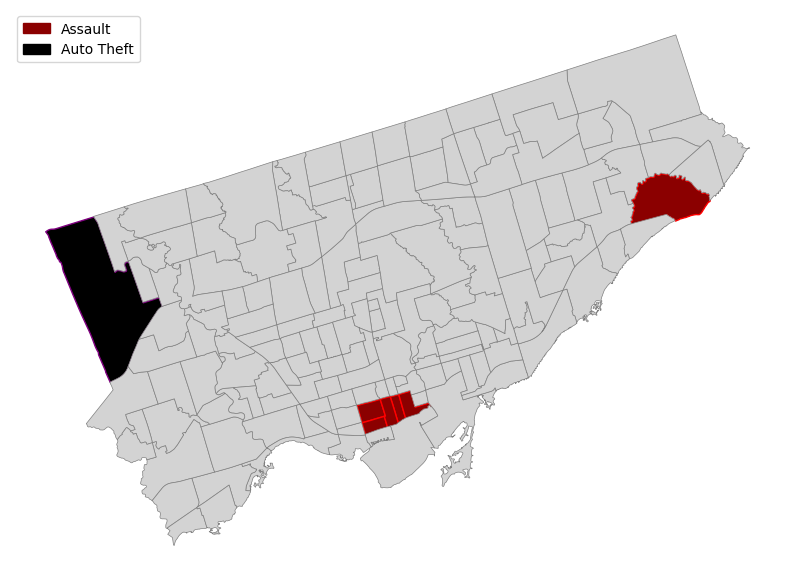

In [7]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the shapefile
gdf = gpd.read_file(os.path.join(folder_path, 'Neighbourhoods.shp'))

# Define colors for different neighborhoods
colors = {
    'Downtown Yonge East': {'fill': 'darkred', 'edge': 'red'}, 
    'Kensington-Chinatown': {'fill': 'darkred', 'edge': 'red'}, 
    'Moss Park': {'fill': 'darkred', 'edge': 'red'}, 
    'Wellington Place': {'fill': 'darkred', 'edge': 'red'}, 
    'West Hill': {'fill': 'darkred', 'edge': 'red'}, 
    'Yonge-Bay Corridor': {'fill': 'darkred', 'edge': 'red'},
    'West Humber-Clairville': {'fill': 'black', 'edge': 'purple'}
}

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot neighborhoods with specified colors and labels
legend_handles = []
legend_labels = set()  # Set to store unique labels
for name, color in colors.items():
    label = 'Assault' if color['fill'] == 'darkred' else 'Auto Theft'
    if label not in legend_labels:
        legend_labels.add(label)
        legend_handles.append(mpatches.Patch(color=color['fill'], label=label))
    gdf[gdf['AREA_NA7'] == name].plot(ax=ax, color=color['fill'], edgecolor=color['edge'], linewidth=1)

# Plot other neighborhoods
gdf[~gdf['AREA_NA7'].isin(colors.keys())].plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=0.5)

# Add legend
ax.legend(handles=legend_handles, loc='upper left')

# Set plot title
#ax.set_title('Highlighted Neighbourhoods')

# Remove axes
ax.set_axis_off()

# Display the plot
plt.show()

# Association: MCI and Season

In [8]:
#Setup for association rule: MCI and Season

# Specify the columns
columns_to_keep = ['MCI_CATEGORY', 'SEASON']
MCI_data_filtered_MCIandSeason = MCI_data_filtered[columns_to_keep]

# Perform one-hot encoding for all categorical columns
df_encoded_MCIandSeason = pd.get_dummies(MCI_data_filtered_MCIandSeason)

df_encoded_MCIandSeason

,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,False,False,False,True,False,False,False,False,True
1,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
365681,False,False,True,False,False,False,False,False,True
365682,True,False,False,False,False,False,False,False,True
365683,True,False,False,False,False,False,False,False,True
365684,True,False,False,False,False,False,False,False,True


In [9]:
from mlxtend.frequent_patterns import apriori

# Use `use_colnames=True` to convert the column names into item names
frequent_itemsets_MCIandSeason = apriori(df_encoded_MCIandSeason, min_support=0.10, use_colnames=True)

# Filter frequent itemsets to only those with size 2
frequent_itemsets_MCIandSeason_filtered = frequent_itemsets_MCIandSeason[
    frequent_itemsets_MCIandSeason['itemsets'].apply(lambda x: len(x)) == 2
]

# Set the display options to increase the maximum column width
pd.set_option('display.max_colwidth', 1000)  # Adjust the number as needed

# Display frequent itemsets of size 2
frequent_itemsets_MCIandSeason_filtered

,support,itemsets
7,0.135192,"(MCI_CATEGORY_Assault, SEASON_Fall)"
8,0.129603,"(MCI_CATEGORY_Assault, SEASON_Spring)"
9,0.143322,"(MCI_CATEGORY_Assault, SEASON_Summer)"
10,0.120844,"(SEASON_Winter, MCI_CATEGORY_Assault)"


In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_MCIandSeason, metric="confidence", min_threshold=0.5)

# Display the generated association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SEASON_Fall),(MCI_CATEGORY_Assault),0.261582,0.528962,0.135192,0.516826,0.977056,-0.003175,0.974882,-0.030821
1,(SEASON_Spring),(MCI_CATEGORY_Assault),0.243605,0.528962,0.129603,0.532021,1.005782,0.000745,1.006536,0.007601
2,(SEASON_Summer),(MCI_CATEGORY_Assault),0.263240,0.528962,0.143322,0.544456,1.029292,0.004079,1.034013,0.038626
3,(SEASON_Winter),(MCI_CATEGORY_Assault),0.231573,0.528962,0.120844,0.521840,0.986536,-0.001649,0.985106,-0.017450


In [11]:
#filter by confidence and lift 
filtered_rules = rules[(rules['confidence'] > 0.50) &
                       (rules['lift'] > 1)]

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(SEASON_Spring),(MCI_CATEGORY_Assault),0.243605,0.528962,0.129603,0.532021,1.005782,0.000745,1.006536,0.007601
2,(SEASON_Summer),(MCI_CATEGORY_Assault),0.263240,0.528962,0.143322,0.544456,1.029292,0.004079,1.034013,0.038626


# Association: MCI and Day of the Week

In [12]:
#Setup for association rule: MCI and Day of the Week

# Specify the columns
columns_to_keep = ['MCI_CATEGORY', 'OCC_DOW']
MCI_data_filtered_MCIandDOW= MCI_data_filtered[columns_to_keep]

# Perform one-hot encoding for all categorical columns
df_encoded_MCIandDOW = pd.get_dummies(MCI_data_filtered_MCIandDOW)

df_encoded_MCIandDOW

,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over,OCC_DOW_Friday,OCC_DOW_Monday,OCC_DOW_Saturday,OCC_DOW_Sunday,OCC_DOW_Thursday,OCC_DOW_Tuesday,OCC_DOW_Wednesday
0,False,False,False,True,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,True,False,False,False
2,True,False,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
365681,False,False,True,False,False,False,False,False,False,False,False,True
365682,True,False,False,False,False,False,False,False,False,False,False,True
365683,True,False,False,False,False,False,False,False,False,False,False,True
365684,True,False,False,False,False,False,False,False,False,False,False,True


In [13]:
from mlxtend.frequent_patterns import apriori

# Use `use_colnames=True` to convert the column names into item names
frequent_itemsets_MCIandDOW = apriori(df_encoded_MCIandDOW, min_support=0.05, use_colnames=True)

# Filter frequent itemsets to only those with size 2
frequent_itemsets_MCIandDOW_filtered = frequent_itemsets_MCIandDOW[
    frequent_itemsets_MCIandDOW['itemsets'].apply(lambda x: len(x)) == 2
]

# Set the display options to increase the maximum column width
pd.set_option('display.max_colwidth', 1000)  # Adjust the number as needed

# Display frequent itemsets of size 2
frequent_itemsets_MCIandDOW_filtered

,support,itemsets
11,0.076938,"(MCI_CATEGORY_Assault, OCC_DOW_Friday )"
12,0.071805,"(MCI_CATEGORY_Assault, OCC_DOW_Monday )"
13,0.083008,"(OCC_DOW_Saturday , MCI_CATEGORY_Assault)"
14,0.082344,"(MCI_CATEGORY_Assault, OCC_DOW_Sunday )"
15,0.071983,"(MCI_CATEGORY_Assault, OCC_DOW_Thursday )"
16,0.070328,"(MCI_CATEGORY_Assault, OCC_DOW_Tuesday )"
17,0.072557,"(MCI_CATEGORY_Assault, OCC_DOW_Wednesday )"


In [14]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_MCIandDOW, metric="confidence", min_threshold=0.5)

# Display the generated association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(OCC_DOW_Friday ),(MCI_CATEGORY_Assault),0.150616,0.528962,0.076938,0.510821,0.965705,-0.002732,0.962915,-0.040133
1,(OCC_DOW_Monday ),(MCI_CATEGORY_Assault),0.139144,0.528962,0.071805,0.516047,0.975584,-0.001797,0.973313,-0.028252
2,(OCC_DOW_Saturday ),(MCI_CATEGORY_Assault),0.147260,0.528962,0.083008,0.563685,1.065644,0.005113,1.079582,0.072238
3,(OCC_DOW_Sunday ),(MCI_CATEGORY_Assault),0.142111,0.528962,0.082344,0.579433,1.095416,0.007173,1.120008,0.101534
4,(OCC_DOW_Thursday ),(MCI_CATEGORY_Assault),0.141739,0.528962,0.071983,0.507852,0.960092,-0.002992,0.957107,-0.046194
5,(OCC_DOW_Tuesday ),(MCI_CATEGORY_Assault),0.137842,0.528962,0.070328,0.510207,0.964544,-0.002585,0.961708,-0.040893
6,(OCC_DOW_Wednesday ),(MCI_CATEGORY_Assault),0.141288,0.528962,0.072557,0.513539,0.970842,-0.002179,0.968295,-0.033793


In [15]:
#filter by confidence and lift 
filtered_rules = rules[(rules['confidence'] > 0.50) &
                       (rules['lift'] > 1)]

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(OCC_DOW_Saturday ),(MCI_CATEGORY_Assault),0.147260,0.528962,0.083008,0.563685,1.065644,0.005113,1.079582,0.072238
3,(OCC_DOW_Sunday ),(MCI_CATEGORY_Assault),0.142111,0.528962,0.082344,0.579433,1.095416,0.007173,1.120008,0.101534


# Association rule: MCI and Workweek/Weekend

In [16]:
#Setup for association rule: MCI and Workweek/Weekend

# Specify the columns
columns_to_keep = ['MCI_CATEGORY', 'DOW_WorkvsEnd']
MCI_data_filtered_MCIandDOW_WorkvsEnd= MCI_data_filtered[columns_to_keep]

# Perform one-hot encoding for all categorical columns
df_encoded_MCIandDOW_WorkvsEnd = pd.get_dummies(MCI_data_filtered_MCIandDOW_WorkvsEnd)

df_encoded_MCIandDOW_WorkvsEnd

,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over,DOW_WorkvsEnd_Weekday,DOW_WorkvsEnd_Weekend
0,False,False,False,True,False,False,True
1,False,False,False,True,False,False,True
2,True,False,False,False,False,False,True
3,True,False,False,False,False,False,True
4,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...
365681,False,False,True,False,False,True,False
365682,True,False,False,False,False,True,False
365683,True,False,False,False,False,True,False
365684,True,False,False,False,False,True,False


In [17]:
from mlxtend.frequent_patterns import apriori

# Use `use_colnames=True` to convert the column names into item names
frequent_itemsets_MCIandDOW_WorkvsEnd = apriori(df_encoded_MCIandDOW_WorkvsEnd, min_support=0.05, use_colnames=True)

# Filter frequent itemsets to only those with size 2
frequent_itemsets_MCIandDOW_WorkvsEnd_filtered = frequent_itemsets_MCIandDOW_WorkvsEnd[
    frequent_itemsets_MCIandDOW_WorkvsEnd['itemsets'].apply(lambda x: len(x)) == 2
]

# Set the display options to increase the maximum column width
pd.set_option('display.max_colwidth', 1000)  # Adjust the number as needed

# Display frequent itemsets of size 2
frequent_itemsets_MCIandDOW_WorkvsEnd_filtered

,support,itemsets
6,0.363610,"(MCI_CATEGORY_Assault, DOW_WorkvsEnd_Weekday)"
7,0.165352,"(DOW_WorkvsEnd_Weekend, MCI_CATEGORY_Assault)"
8,0.117341,"(DOW_WorkvsEnd_Weekday, MCI_CATEGORY_Auto Theft)"
9,0.140109,"(MCI_CATEGORY_Break and Enter, DOW_WorkvsEnd_Weekday)"
10,0.050073,"(DOW_WorkvsEnd_Weekend, MCI_CATEGORY_Break and Enter)"
11,0.064391,"(MCI_CATEGORY_Robbery, DOW_WorkvsEnd_Weekday)"


In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_MCIandDOW_WorkvsEnd, metric="confidence", min_threshold=0.5)

# Display the generated association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(MCI_CATEGORY_Assault),(DOW_WorkvsEnd_Weekday),0.528962,0.710629,0.363610,0.687402,0.967316,-0.012286,0.925699,-0.066931
1,(DOW_WorkvsEnd_Weekday),(MCI_CATEGORY_Assault),0.710629,0.528962,0.363610,0.511673,0.967316,-0.012286,0.964596,-0.104557
2,(DOW_WorkvsEnd_Weekend),(MCI_CATEGORY_Assault),0.289371,0.528962,0.165352,0.571419,1.080265,0.012286,1.099064,0.104557
3,(MCI_CATEGORY_Auto Theft),(DOW_WorkvsEnd_Weekday),0.157818,0.710629,0.117341,0.743520,1.046284,0.005191,1.128239,0.052526
4,(MCI_CATEGORY_Break and Enter),(DOW_WorkvsEnd_Weekday),0.190182,0.710629,0.140109,0.736710,1.036702,0.004960,1.099061,0.043717
5,(MCI_CATEGORY_Robbery),(DOW_WorkvsEnd_Weekday),0.089869,0.710629,0.064391,0.716498,1.008260,0.000527,1.020704,0.009001


In [19]:
#filter by confidence and lift 
filtered_rules = rules[(rules['confidence'] > 0.50) &
                       (rules['lift'] > 1)]

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(DOW_WorkvsEnd_Weekend),(MCI_CATEGORY_Assault),0.289371,0.528962,0.165352,0.571419,1.080265,0.012286,1.099064,0.104557
3,(MCI_CATEGORY_Auto Theft),(DOW_WorkvsEnd_Weekday),0.157818,0.710629,0.117341,0.743520,1.046284,0.005191,1.128239,0.052526
4,(MCI_CATEGORY_Break and Enter),(DOW_WorkvsEnd_Weekday),0.190182,0.710629,0.140109,0.736710,1.036702,0.004960,1.099061,0.043717
5,(MCI_CATEGORY_Robbery),(DOW_WorkvsEnd_Weekday),0.089869,0.710629,0.064391,0.716498,1.008260,0.000527,1.020704,0.009001


# Association: MCI and Premises Type

In [20]:
#Setup for association rule: MCI and Premises Type

# Specify the columns
columns_to_keep = ['MCI_CATEGORY', 'PREMISES_TYPE']
MCI_data_filtered_MCIandPremises = MCI_data_filtered[columns_to_keep]

# Perform one-hot encoding for all categorical columns
df_encoded_MCIandPremises = pd.get_dummies(MCI_data_filtered_MCIandPremises)

df_encoded_MCIandPremises

,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over,PREMISES_TYPE_Apartment,PREMISES_TYPE_Commercial,PREMISES_TYPE_Educational,PREMISES_TYPE_House,PREMISES_TYPE_Other,PREMISES_TYPE_Outside,PREMISES_TYPE_Transit
0,False,False,False,True,False,False,False,False,False,False,True,False
1,False,False,False,True,False,False,False,False,False,False,True,False
2,True,False,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
365681,False,False,True,False,False,True,False,False,False,False,False,False
365682,True,False,False,False,False,False,False,False,True,False,False,False
365683,True,False,False,False,False,False,False,False,True,False,False,False
365684,True,False,False,False,False,True,False,False,False,False,False,False


In [21]:
from mlxtend.frequent_patterns import apriori

# Use `use_colnames=True` to convert the column names into item names
frequent_itemsets_MCIandPremises = apriori(df_encoded_MCIandPremises, min_support=0.10, use_colnames=True)

# Filter frequent itemsets to only those with size 2
frequent_itemsets_MCIandPremises_filtered = frequent_itemsets_MCIandPremises[
    frequent_itemsets_MCIandPremises['itemsets'].apply(lambda x: len(x)) == 2
]

# Set the display options to increase the maximum column width
pd.set_option('display.max_colwidth', 1000)  # Adjust the number as needed

# Display frequent itemsets of size 2
frequent_itemsets_MCIandPremises_filtered

,support,itemsets
7,0.167329,"(MCI_CATEGORY_Assault, PREMISES_TYPE_Apartment)"
8,0.129849,"(MCI_CATEGORY_Assault, PREMISES_TYPE_Outside)"


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_MCIandPremises, metric="confidence", min_threshold=0.5)

# Display the generated association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PREMISES_TYPE_Apartment),(MCI_CATEGORY_Assault),0.235954,0.528962,0.167329,0.709161,1.340666,0.042519,1.619586,0.332574


# Association: MCI and Time

In [23]:
#Setup for association rule: MCI and Time

# Specify the columns
columns_to_keep = ['MCI_CATEGORY', 'TIMECategory']
MCI_data_filtered_MCIandTime = MCI_data_filtered[columns_to_keep]

# Perform one-hot encoding for all categorical columns
df_encoded_MCIandTime = pd.get_dummies(MCI_data_filtered_MCIandTime)

df_encoded_MCIandTime

,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over,TIMECategory_Afternoon,TIMECategory_Evening,TIMECategory_Morning,TIMECategory_Night
0,False,False,False,True,False,False,False,False,True
1,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
365681,False,False,True,False,False,True,False,False,False
365682,True,False,False,False,False,True,False,False,False
365683,True,False,False,False,False,True,False,False,False
365684,True,False,False,False,False,False,True,False,False


In [24]:
from mlxtend.frequent_patterns import apriori

# Use `use_colnames=True` to convert the column names into item names
frequent_itemsets_MCIandTime = apriori(df_encoded_MCIandTime, min_support=0.10, use_colnames=True)

# Filter frequent itemsets to only those with size 2
frequent_itemsets_MCIandTime_filtered = frequent_itemsets_MCIandTime[
    frequent_itemsets_MCIandTime['itemsets'].apply(lambda x: len(x)) == 2
]

# Set the display options to increase the maximum column width
pd.set_option('display.max_colwidth', 1000)  # Adjust the number as needed

# Display frequent itemsets of size 2
frequent_itemsets_MCIandTime_filtered

,support,itemsets
7,0.162325,"(MCI_CATEGORY_Assault, TIMECategory_Afternoon)"
8,0.165276,"(MCI_CATEGORY_Assault, TIMECategory_Evening)"
9,0.109813,"(MCI_CATEGORY_Assault, TIMECategory_Night)"


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_MCIandTime, metric="confidence", min_threshold=0.5)

# Display the generated association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(TIMECategory_Afternoon),(MCI_CATEGORY_Assault),0.278602,0.528962,0.162325,0.582641,1.101479,0.014955,1.128615,0.127710
1,(TIMECategory_Evening),(MCI_CATEGORY_Assault),0.322386,0.528962,0.165276,0.512664,0.969189,-0.005254,0.966557,-0.044813


In [26]:
#filter by confidence and lift 
filtered_rules = rules[(rules['confidence'] > 0.50) &
                       (rules['lift'] > 1)]

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(TIMECategory_Afternoon),(MCI_CATEGORY_Assault),0.278602,0.528962,0.162325,0.582641,1.101479,0.014955,1.128615,0.12771


### Remove null for temp category

In [27]:
# see how many Null values there are
nodata_count_before = MCI_data_filtered.isnull().sum()
print(f'Number of no-data values in each column:\n{nodata_count_before} \n')

Number of no-data values in each column:
SEASON                  0
OCC_DOW                 0
DOW_WorkvsEnd           0
TIMECategory            0
PREMISES_TYPE           0
MCI_CATEGORY            0
NEIGHBOURHOOD_158       0
TEMPCategory         1329
dtype: int64 



In [28]:
num_rows = MCI_data_filtered.shape[0]
print(f'Number of rows in MCI_data_filtered: {num_rows}')

Number of rows in MCI_data_filtered: 365686


In [29]:
# Clean data, remove null values by copying it to a new DataFrame
# had to add subset of the fields... not sure why it was not working without it
MCI_data_filtered = MCI_data_filtered.dropna(subset=['TEMPCategory']).copy()

In [30]:
# See how many Null values there are after cleaning, should be 0
nodata_count_after = MCI_data_filtered.isnull().sum()
print(f'Number of no-data values in each column after cleaning:\n{nodata_count_after} \n')

Number of no-data values in each column after cleaning:
SEASON               0
OCC_DOW              0
DOW_WorkvsEnd        0
TIMECategory         0
PREMISES_TYPE        0
MCI_CATEGORY         0
NEIGHBOURHOOD_158    0
TEMPCategory         0
dtype: int64 



In [31]:
num_rows = MCI_data_filtered.shape[0]
print(f'Number of rows in MCI_data_filtered: {num_rows}')

Number of rows in MCI_data_filtered: 364357


# Association: MCI and Temp

In [32]:
#Setup for association rule: MCI and Temperature

# Specify the columns
columns_to_keep = ['MCI_CATEGORY', 'TEMPCategory']
MCI_data_filtered_MCIandTemp = MCI_data_filtered[columns_to_keep]

# Perform one-hot encoding for all categorical columns
df_encoded_MCIandTemp = pd.get_dummies(MCI_data_filtered_MCIandTemp)

df_encoded_MCIandTemp

,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over,TEMPCategory_Chilly,TEMPCategory_Cold,TEMPCategory_Cool,TEMPCategory_Hot,TEMPCategory_Mild,TEMPCategory_Very Cold,TEMPCategory_Very Hot,TEMPCategory_Warm
0,False,False,False,True,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365681,False,False,True,False,False,True,False,False,False,False,False,False,False
365682,True,False,False,False,False,True,False,False,False,False,False,False,False
365683,True,False,False,False,False,True,False,False,False,False,False,False,False
365684,True,False,False,False,False,True,False,False,False,False,False,False,False


In [33]:
from mlxtend.frequent_patterns import apriori

# Use `use_colnames=True` to convert the column names into item names
frequent_itemsets_MCIandTemp = apriori(df_encoded_MCIandTemp, min_support=0.10, use_colnames=True)

# Filter frequent itemsets to only those with size 2
frequent_itemsets_MCIandTemp_filtered = frequent_itemsets_MCIandTemp[
    frequent_itemsets_MCIandTemp['itemsets'].apply(lambda x: len(x)) == 2
]

# Set the display options to increase the maximum column width
pd.set_option('display.max_colwidth', 1000)  # Adjust the number as needed

# Display frequent itemsets of size 2
frequent_itemsets_MCIandTemp_filtered

,support,itemsets
6,0.125978,"(MCI_CATEGORY_Assault, TEMPCategory_Hot)"
7,0.162132,"(MCI_CATEGORY_Assault, TEMPCategory_Mild)"
8,0.151107,"(TEMPCategory_Warm, MCI_CATEGORY_Assault)"


In [34]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_MCIandTemp, metric="confidence", min_threshold=0.5)

# Display the generated association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(TEMPCategory_Hot),(MCI_CATEGORY_Assault),0.222392,0.528921,0.125978,0.566469,1.070991,0.008350,1.086611,0.085242
1,(TEMPCategory_Mild),(MCI_CATEGORY_Assault),0.316168,0.528921,0.162132,0.512804,0.969529,-0.005096,0.966919,-0.043940
2,(TEMPCategory_Warm),(MCI_CATEGORY_Assault),0.290287,0.528921,0.151107,0.520545,0.984164,-0.002431,0.982530,-0.022169


In [35]:
#filter by confidence and lift 
filtered_rules = rules[(rules['confidence'] > 0.50) &
                       (rules['lift'] > 1)]

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(TEMPCategory_Hot),(MCI_CATEGORY_Assault),0.222392,0.528921,0.125978,0.566469,1.070991,0.00835,1.086611,0.085242


# Association: MCI and All Variables (Season/DOW/Weekday and Weekend/Time/Premises/Temp/Neighbourhood)

In [36]:
MCI_data_filtered.drop('OCC_DOW', axis=1, inplace=True)

MCI_data_filtered

,SEASON,DOW_WorkvsEnd,TIMECategory,PREMISES_TYPE,MCI_CATEGORY,NEIGHBOURHOOD_158,TEMPCategory
0,Winter,Weekend,Night,Outside,Robbery,Corso Italia-Davenport,Mild
1,Winter,Weekend,Night,Outside,Robbery,St Lawrence-East Bayfront-The Islands,Mild
2,Winter,Weekend,Morning,Apartment,Assault,Morningside Heights,Mild
3,Winter,Weekend,Night,Outside,Assault,New Toronto,Mild
4,Winter,Weekend,Evening,Outside,Auto Theft,Victoria Village,Mild
...,...,...,...,...,...,...,...
365681,Winter,Weekday,Afternoon,Apartment,Break and Enter,Wellington Place,Chilly
365682,Winter,Weekday,Afternoon,House,Assault,Bendale-Glen Andrew,Chilly
365683,Winter,Weekday,Afternoon,House,Assault,Bendale-Glen Andrew,Chilly
365684,Winter,Weekday,Evening,Apartment,Assault,Greenwood-Coxwell,Chilly


In [37]:
# Perform one-hot encoding for columns
df_encoded_ALL = pd.get_dummies(MCI_data_filtered)

df_encoded_ALL

,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter,DOW_WorkvsEnd_Weekday,DOW_WorkvsEnd_Weekend,TIMECategory_Afternoon,TIMECategory_Evening,TIMECategory_Morning,TIMECategory_Night,...,NEIGHBOURHOOD_158_York University Heights,NEIGHBOURHOOD_158_Yorkdale-Glen Park,TEMPCategory_Chilly,TEMPCategory_Cold,TEMPCategory_Cool,TEMPCategory_Hot,TEMPCategory_Mild,TEMPCategory_Very Cold,TEMPCategory_Very Hot,TEMPCategory_Warm
0,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365681,False,False,False,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
365682,False,False,False,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
365683,False,False,False,True,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
365684,False,False,False,True,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [38]:
from mlxtend.frequent_patterns import apriori

# Use `use_colnames=True` to convert the column names into item names
frequent_itemsets_ALL = apriori(df_encoded_ALL, min_support=0.05, use_colnames=True)

# Filter frequent itemsets to only those with size 3
frequent_itemsets_ALL_filtered = frequent_itemsets_ALL[
    frequent_itemsets_ALL['itemsets'].apply(lambda x: len(x)) == 3
]

# Display frequent itemsets of size 3
frequent_itemsets_ALL_filtered

,support,itemsets
142,0.055435,"(TIMECategory_Afternoon, SEASON_Fall, DOW_WorkvsEnd_Weekday)"
143,0.060685,"(TIMECategory_Evening, SEASON_Fall, DOW_WorkvsEnd_Weekday)"
144,0.050681,"(PREMISES_TYPE_Outside, SEASON_Fall, DOW_WorkvsEnd_Weekday)"
145,0.093343,"(MCI_CATEGORY_Assault, SEASON_Fall, DOW_WorkvsEnd_Weekday)"
146,0.062458,"(DOW_WorkvsEnd_Weekday, SEASON_Fall, TEMPCategory_Mild)"
147,0.087357,"(TEMPCategory_Warm, SEASON_Fall, DOW_WorkvsEnd_Weekday)"
148,0.062194,"(TEMPCategory_Warm, MCI_CATEGORY_Assault, SEASON_Fall)"
149,0.052267,"(TIMECategory_Afternoon, SEASON_Spring, DOW_WorkvsEnd_Weekday)"
150,0.055973,"(TIMECategory_Evening, SEASON_Spring, DOW_WorkvsEnd_Weekday)"
151,0.089484,"(MCI_CATEGORY_Assault, SEASON_Spring, DOW_WorkvsEnd_Weekday)"


In [39]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_ALL, metric="confidence", min_threshold=0.5)

# Filter association rules to include only those with antecedents or consequents containing "MCI_CATEGORY_*"
filtered_rules = rules[
    (rules['antecedents'].astype(str).str.contains('MCI_CATEGORY_', regex=True)) |
    (rules['consequents'].astype(str).str.contains('MCI_CATEGORY_', regex=True))
]

# Filter association rules to include only those with more than one antecedent (field)
filtered_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x)) > 1]

# Display the filtered association rules
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
40,"(MCI_CATEGORY_Assault, SEASON_Fall)",(DOW_WorkvsEnd_Weekday),0.135208,0.710229,0.093343,0.690362,0.972027,-0.002686,0.935838,-0.032205
41,"(SEASON_Fall, DOW_WorkvsEnd_Weekday)",(MCI_CATEGORY_Assault),0.186460,0.528921,0.093343,0.500603,0.946462,-0.005280,0.943297,-0.065011
44,"(TEMPCategory_Warm, SEASON_Fall)",(MCI_CATEGORY_Assault),0.120434,0.528921,0.062194,0.516419,0.976364,-0.001506,0.974148,-0.026785
47,"(MCI_CATEGORY_Assault, SEASON_Spring)",(DOW_WorkvsEnd_Weekday),0.129535,0.710229,0.089484,0.690807,0.972653,-0.002516,0.937183,-0.031289
48,"(SEASON_Spring, DOW_WorkvsEnd_Weekday)",(MCI_CATEGORY_Assault),0.173250,0.528921,0.089484,0.516499,0.976515,-0.002152,0.974309,-0.028268
51,"(SEASON_Spring, TEMPCategory_Mild)",(MCI_CATEGORY_Assault),0.116114,0.528921,0.059933,0.516156,0.975866,-0.001482,0.973617,-0.027218
54,"(MCI_CATEGORY_Assault, SEASON_Summer)",(DOW_WorkvsEnd_Weekday),0.143148,0.710229,0.097094,0.678279,0.955014,-0.004574,0.900690,-0.052110
55,"(SEASON_Summer, DOW_WorkvsEnd_Weekday)",(MCI_CATEGORY_Assault),0.185041,0.528921,0.097094,0.524718,0.992054,-0.000778,0.991157,-0.009733
67,"(MCI_CATEGORY_Assault, SEASON_Summer)",(TEMPCategory_Hot),0.143148,0.222392,0.093935,0.656211,2.950698,0.062100,2.261877,0.771542
68,"(MCI_CATEGORY_Assault, TEMPCategory_Hot)",(SEASON_Summer),0.125978,0.262896,0.093935,0.745648,2.836286,0.060816,2.897971,0.740744


In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_ALL, metric="confidence", min_threshold=0.5)

# Filter association rules to include only those with a consequent or antecedent containing "MCI_CATEGORY_"
filtered_rules = rules[
    (rules['consequents'].astype(str).str.contains('MCI_CATEGORY_', regex=True)) |
    (rules['antecedents'].astype(str).str.contains('MCI_CATEGORY_', regex=True))
]

# Filter association rules to include only those with more than one antecedent (field)
filtered_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x)) > 1]

# Filter association rules to include only those with lift greater than 1
filtered_rules = filtered_rules[filtered_rules['lift'] > 1]

# Filter association rules to include only those with support greater than 5%
filtered_rules = filtered_rules[filtered_rules['support'] > 0.05]

# Display the filtered association rules
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
67,"(MCI_CATEGORY_Assault, SEASON_Summer)",(TEMPCategory_Hot),0.143148,0.222392,0.093935,0.656211,2.950698,0.062100,2.261877,0.771542
68,"(MCI_CATEGORY_Assault, TEMPCategory_Hot)",(SEASON_Summer),0.125978,0.262896,0.093935,0.745648,2.836286,0.060816,2.897971,0.740744
69,"(SEASON_Summer, TEMPCategory_Hot)",(MCI_CATEGORY_Assault),0.166858,0.528921,0.093935,0.562965,1.064365,0.005681,1.077897,0.072584
76,"(MCI_CATEGORY_Assault, TIMECategory_Afternoon)",(DOW_WorkvsEnd_Weekday),0.162319,0.710229,0.118326,0.728974,1.026393,0.003043,1.069163,0.030697
77,"(TIMECategory_Afternoon, DOW_WorkvsEnd_Weekday)",(MCI_CATEGORY_Assault),0.206001,0.528921,0.118326,0.574396,1.085977,0.009368,1.106848,0.099711
85,"(TIMECategory_Evening, MCI_CATEGORY_Auto Theft)",(DOW_WorkvsEnd_Weekday),0.070261,0.710229,0.052945,0.753555,1.061002,0.003044,1.175801,0.061840
89,"(MCI_CATEGORY_Assault, TIMECategory_Morning)",(DOW_WorkvsEnd_Weekday),0.091213,0.710229,0.067664,0.741831,1.044495,0.002882,1.122406,0.046875
90,"(TIMECategory_Morning, DOW_WorkvsEnd_Weekday)",(MCI_CATEGORY_Assault),0.127575,0.528921,0.067664,0.530387,1.002773,0.000187,1.003123,0.003170
94,"(PREMISES_TYPE_Apartment, DOW_WorkvsEnd_Weekday)",(MCI_CATEGORY_Assault),0.163063,0.528921,0.111846,0.685910,1.296811,0.025599,1.499825,0.273471
98,"(PREMISES_TYPE_Outside, MCI_CATEGORY_Auto Theft)",(DOW_WorkvsEnd_Weekday),0.083199,0.710229,0.060185,0.723395,1.018538,0.001095,1.047598,0.019852


In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_ALL, metric="confidence", min_threshold=0.5)

# Filter association rules to include only those with a consequent or antecedent containing "MCI_CATEGORY_"
filtered_rules = rules[
    (rules['consequents'].astype(str).str.contains('MCI_CATEGORY_Assault', regex=True)) |
    (rules['antecedents'].astype(str).str.contains('MCI_CATEGORY_Assault', regex=True))
]

# Filter association rules to include only those with more than one antecedent (field)
filtered_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x)) > 1]

# Filter association rules to include only those with lift greater than 1
filtered_rules = filtered_rules[filtered_rules['lift'] > 2]

# Filter association rules to include only those with support greater than 5%
filtered_rules = filtered_rules[filtered_rules['support'] > 0.05]

# Display the filtered association rules
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
67,"(MCI_CATEGORY_Assault, SEASON_Summer)",(TEMPCategory_Hot),0.143148,0.222392,0.093935,0.656211,2.950698,0.062100,2.261877,0.771542
68,"(MCI_CATEGORY_Assault, TEMPCategory_Hot)",(SEASON_Summer),0.125978,0.262896,0.093935,0.745648,2.836286,0.060816,2.897971,0.740744
112,"(MCI_CATEGORY_Assault, SEASON_Summer, DOW_WorkvsEnd_Weekday)",(TEMPCategory_Hot),0.097094,0.222392,0.064486,0.664160,2.986443,0.042893,2.315415,0.736681
113,"(MCI_CATEGORY_Assault, TEMPCategory_Hot, DOW_WorkvsEnd_Weekday)",(SEASON_Summer),0.087088,0.262896,0.064486,0.740475,2.816607,0.041591,2.840200,0.706489
115,"(MCI_CATEGORY_Assault, TEMPCategory_Hot)","(SEASON_Summer, DOW_WorkvsEnd_Weekday)",0.125978,0.185041,0.064486,0.511884,2.766328,0.041175,1.669602,0.730542


In [45]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_ALL, metric="confidence", min_threshold=0.5)

# Filter association rules to include only those with a consequent containing "MCI_CATEGORY_Assault" and an antecedent containing "PREMISES_TYPE_Apartment"
filtered_rules = rules[
    (rules['antecedents'].astype(str).str.contains('PREMISES_TYPE_Apartment', regex=True)) &
    (rules['consequents'].astype(str).str.contains('MCI_CATEGORY_Assault', regex=True))
]

# Filter association rules to include only those with more than one antecedent (field)
filtered_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x)) > 1]

# Filter association rules to include only those with lift greater than 1
filtered_rules = filtered_rules[filtered_rules['lift'] > 1]

# Filter association rules to include only those with support greater than 5%
filtered_rules = filtered_rules[filtered_rules['support'] > 0.05]

# Display the filtered association rules
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
94,"(PREMISES_TYPE_Apartment, DOW_WorkvsEnd_Weekday)",(MCI_CATEGORY_Assault),0.163063,0.528921,0.111846,0.685910,1.296811,0.025599,1.499825,0.273471
107,"(DOW_WorkvsEnd_Weekend, PREMISES_TYPE_Apartment)",(MCI_CATEGORY_Assault),0.072874,0.528921,0.055490,0.761449,1.439628,0.016945,1.974754,0.329379
109,"(PREMISES_TYPE_Apartment, TIMECategory_Evening)",(MCI_CATEGORY_Assault),0.071150,0.528921,0.054897,0.771563,1.458750,0.017264,2.062185,0.338571
110,"(PREMISES_TYPE_Apartment, TEMPCategory_Mild)",(MCI_CATEGORY_Assault),0.075226,0.528921,0.053387,0.709694,1.341777,0.013599,1.622698,0.275440


In [43]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate association rules from frequent itemsets with confidence of 50% or greater
rules = association_rules(frequent_itemsets_ALL, metric="confidence", min_threshold=0.5)

# Filter association rules to include only those with a consequent or antecedent containing "MCI_CATEGORY_"
filtered_rules = rules[
    (rules['consequents'].astype(str).str.contains('MCI_CATEGORY_Auto Theft', regex=True)) |
    (rules['antecedents'].astype(str).str.contains('MCI_CATEGORY_Auto Theft', regex=True))
]

# Filter association rules to include only those with more than one antecedent (field)
filtered_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x)) > 1]

# Filter association rules to include only those with support greater than 5%
filtered_rules = filtered_rules[filtered_rules['support'] > 0.05]

# Display the filtered association rules
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
85,"(TIMECategory_Evening, MCI_CATEGORY_Auto Theft)",(DOW_WorkvsEnd_Weekday),0.070261,0.710229,0.052945,0.753555,1.061002,0.003044,1.175801,0.061840
98,"(PREMISES_TYPE_Outside, MCI_CATEGORY_Auto Theft)",(DOW_WorkvsEnd_Weekday),0.083199,0.710229,0.060185,0.723395,1.018538,0.001095,1.047598,0.019852
99,"(MCI_CATEGORY_Auto Theft, DOW_WorkvsEnd_Weekday)",(PREMISES_TYPE_Outside),0.117437,0.268061,0.060185,0.512492,1.911845,0.028705,1.501387,0.540409
